<a href="https://colab.research.google.com/github/stephmather/Drills/blob/master/Stephanie_Mather_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [0]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV # replaced above with correct package

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [0]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[round(num_test/2):], newsgroups_test.target[round(num_test/2):]
dev_data, dev_labels = newsgroups_test.data[:round(num_test/2)], newsgroups_test.target[:round(num_test/2)]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print ('training label shape:', train_labels.shape)
print ('test label shape:', test_labels.shape)
print ('dev label shape:', dev_labels.shape)
print ('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [0]:
def P1(num_examples=5):
### STUDENT START ###
  for i in range(num_examples):
    print ('Example: %d\n Label: %s  \n Text: \n%s \n\n' %(i+1, newsgroups_train.target_names[train_labels[i]], train_data[i]))

  
### STUDENT END ###
P1()

Example: 1
 Label: comp.graphics  
 Text: 
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych 


Example: 2
 Label: talk.religion.misc  
 Text: 


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating suc

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [0]:
def P2(train_data, dev_data):
### STUDENT START ###

 ## Part a
   # create the transform
  vectorizer = CountVectorizer()
  
  # tokenize and build vocab then encode document
  vector = vectorizer.fit_transform(train_data)
  
  # summarize what was tokenized and the encoded vector
  print ("Part a. What is the size of the vocabulary? \nWhat is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero?")   
  print ('The size of the vocabulary is', vector.shape[1], "words.")  
  average_non_zero = [vector[i].nnz for i in range(vector.shape[0])]
  print ("The average number of non-zero features per example is", round(np.asarray(average_non_zero).mean(),2))
  print("The fraction of the entries in the matrix that are non zero is",round(np.asarray(average_non_zero).mean()/vector.shape[1],4))
  
 ## Part b
  print("\nPart b. What are the 0th and last feature strings (in alphabetical order)?")
  print("The first feature string is '"+ vectorizer.get_feature_names()[0]+ "' and the last feature string is '"+ vectorizer.get_feature_names()[-1]+"'.")
  
  
  ## Part c
  print('\nPart c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"].\nConfirm the training vectors are appropriately shaped. \nNow what\'s the average number of non-zero features per example?')
  # list of text vocabulary
  text = ["atheism", "graphics", "space", "religion"]
  # tokenize and build vocab
  vectorizer.fit(text)
  # summarize what was tokenized
  print("The vocabulary is: ",vectorizer.vocabulary_)
  # encode document using vocab
  vector = vectorizer.transform(train_data)
  
  print ('The size of the vocabulary is now', vector.shape[1], "words. The training vector shape is:",vector.shape, ", which is as expected for 2034 samples")  
  average_non_zero = [vector[i].nnz for i in range(vector.shape[0])]
  print ("The average number of non-zero features per example for the 4 word vocabulary is", round(np.asarray(average_non_zero).mean(),2))
  print("The fraction of the entries in the martix that are non zero is now",round(np.asarray(average_non_zero).mean()/vector.shape[1],4))
  
  
  ## Part d
  print ('\nPart d. Instead of extracting unigram word features, use "analyzer" and "ngram_range"\n to extract bigram and trigram character features. \nWhat size vocabulary does this yield?')
   # create the transform for bigram and trigram features
  vectorizer = CountVectorizer(ngram_range=(2, 3), analyzer = 'char')
  # tokenize and build vocab then encode document
  vector = vectorizer.fit_transform(train_data)
  # summarize what was tokenized and the encoded vector
  print ('The size of the vocabulary is', vector.shape[1], "bigrams and trigram characters.") 
  average_non_zero = [vector[i].nnz for i in range(vector.shape[0])]
  print ("The average number of non-zero features per example is", round(np.asarray(average_non_zero).mean(),2))
  print("The fraction of the entries in the matrix that are non zero are",round(np.asarray(average_non_zero).mean()/vector.shape[1],4))
  print("The first feature string is "+ "'" +vectorizer.get_feature_names()[0]+ "' and the last feature string is '"+ vectorizer.get_feature_names()[-1]+"'.")
  
  
  print ('\nPart e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. \nWhat size vocabulary does this yield?')
  # create the transform for unigram features, limited to features that appear in more than 10 documents
  vectorizer = CountVectorizer(min_df=10)
  # tokenize and build vocab then encode document
  vector = vectorizer.fit_transform(train_data)
  # summarize what was tokenized and the encoded vector
  print ('The size of the vocabulary is', vector.shape[1], "words.") 
  average_non_zero = [vector[i].nnz for i in range(vector.shape[0])]
  print ("The average number of non-zero features per example is", round(np.asarray(average_non_zero).mean(),2))
  print("The fraction of the entries in the matrix that are non zero is",round(np.asarray(average_non_zero).mean()/vector.shape[1],4))
  print("The first feature string is '"+ vectorizer.get_feature_names()[0]+ "' and the last feature string is '"+ vectorizer.get_feature_names()[-1]+"'.")

  print ('\nPart f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? \nHint: build a vocabulary for both train and dev and look at the size of the difference.')
  # create the standard transform
  vectorizer = CountVectorizer()
  # tokenize and build vocab then encode document
  vector1 = vectorizer.fit_transform(train_data)
  vocab1 = vectorizer.vocabulary_
  vector2 = vectorizer.fit_transform(dev_data)
  vocab2 = vectorizer.vocabulary_
  # get difference between two vocab lists
  diff_vocab = set(vocab2) - set(vocab1)
  print("The fraction of words in the dev_data set that are not in the training set are: ", round(len(diff_vocab)/len(set(vocab2)),3))
### STUDENT END ###
P2(train_data, dev_data)

Part a. What is the size of the vocabulary? 
What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero?
The size of the vocabulary is 26879 words.
The average number of non-zero features per example is 96.71
The fraction of the entries in the matrix that are non zero is 0.0036

Part b. What are the 0th and last feature strings (in alphabetical order)?
The first feature string is '00' and the last feature string is 'zyxel'.

Part c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"].
Confirm the training vectors are appropriately shaped. 
Now what's the average number of non-zero features per example?
The vocabulary is:  {'atheism': 0, 'graphics': 1, 'space': 3, 'religion': 2}
The size of the vocabulary is now 4 words. The training vector shape is: (2034, 4) , which is as expected for 2034 samples
The average number of non-zero features per example for the 4 word vocabulary is 0.27
The fractio

 (3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [0]:
## Nearest Neighboours model

def P3a_knn():
 
  # Process data
  pro_train_data, pro_dev_data, vectorizer = preprocessor(train_data, dev_data)
  
  #knn model
  k_values = [1, 3, 5, 7, 9, 21, 31, 51, 81, 101, 121, 151, 201, 251, 300]
  knn_model(k_values, pro_train_data, pro_dev_data, train_labels, dev_labels)
  
  #best k
  model = KNeighborsClassifier(n_neighbors=121)
  my_score = get_score(model, pro_train_data, pro_dev_data, train_labels, dev_labels)
  print("\n\nThe best K-Nearest Neighbors is with k: %s and the f1 score is %s" %(121, round(my_score,3)))

  return pro_train_data, pro_dev_data
  
def preprocessor(train_data, dev_data, **kwargs):
  vectorizer = CountVectorizer(**kwargs)
  pro_train_data = vectorizer.fit_transform(train_data)
  pro_dev_data = vectorizer.transform(dev_data)
  return pro_train_data, pro_dev_data, vectorizer

def knn_model(k_values, train_data, dev_data, train_labels, dev_labels):
  """fit K-Nearest-Neighbors model with different number of k using the mini training set and return score"""
  # compare score with differing values of k_values
  for k_value in k_values:
      model = KNeighborsClassifier(n_neighbors=k_value)
      my_score = get_score(model, train_data, dev_data, train_labels, dev_labels)
      print("K-Nearest Neighbors with k: %s the f1 score is %s" %(k_value, round(my_score,3)))

def get_score(model, train_X, val_X, train_y, val_y):
  """Function to return single accuracy score for a model"""  
  model.fit(train_X, train_y)
  pred_y = model.predict(val_X)
  accuracy = metrics.f1_score(val_y, pred_y, average = 'micro') 
  return(accuracy)


  ### STUDENT END ###
pro_train_data, pro_dev_data = P3a_knn()

K-Nearest Neighbors with k: 1 the f1 score is 0.383
K-Nearest Neighbors with k: 3 the f1 score is 0.414
K-Nearest Neighbors with k: 5 the f1 score is 0.423
K-Nearest Neighbors with k: 7 the f1 score is 0.444
K-Nearest Neighbors with k: 9 the f1 score is 0.43
K-Nearest Neighbors with k: 21 the f1 score is 0.423
K-Nearest Neighbors with k: 31 the f1 score is 0.447
K-Nearest Neighbors with k: 51 the f1 score is 0.419
K-Nearest Neighbors with k: 81 the f1 score is 0.451
K-Nearest Neighbors with k: 101 the f1 score is 0.459
K-Nearest Neighbors with k: 121 the f1 score is 0.467
K-Nearest Neighbors with k: 151 the f1 score is 0.442
K-Nearest Neighbors with k: 201 the f1 score is 0.454
K-Nearest Neighbors with k: 251 the f1 score is 0.428
K-Nearest Neighbors with k: 300 the f1 score is 0.413


The best K-Nearest Neighbors is with k: 121 and the f1 score is 0.467


a. Why doesn't nearest neighbors work well for this problem?

T*he sparse nature of the matrix produced by the 'bag of words' approach means that there are a large number of features per sample. There are also many features which are common to all samples such as stop words (eg. 'the', 'and', or 'a'). This makes it hard for the kNN model to effectively group the text samples together in a high dimensional space.*

*We get a very rough clumping of the data as witnessed by an increase over the base accuracy (25% for 4 labels randomly allocated), but little effect of changing the k parameter.  If the kNN model was more suitable for the problem we would expect to see more of a trend between k and the f1 score.*

*Also apparent is the 'curse of dimensionality' as the kNN model is slow in this instance.*

In [0]:
def P3b_mNB():
  """Function to train and optimise Multinomial Naive Bayes classifier"""
  
  # Gridsearch parameters
  alphas = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
  MultinomialNB_model(alphas, pro_train_data, pro_dev_data, train_labels, dev_labels)
  
def MultinomialNB_model(alphas, train_data, dev_data, train_labels, dev_labels):
  """ Function to Grid search Multinomial Naive Bayes classifier for best alpha"""
  gridsearch = GridSearchCV(MultinomialNB(), alphas, cv=3)
  gridsearch.fit(train_data, train_labels,)
  grid_predict = gridsearch.predict(dev_data)
  
  #Report accuracy
  my_score = get_score(gridsearch, train_data, dev_data, train_labels, dev_labels)
  print ("\n\nMultinomial NB classifier is optimized with an alpha of %f, giving a f1 score of %.3f\n\n" %(gridsearch.best_params_['alpha'], my_score))

  return gridsearch

P3b_mNB()



Multinomial NB classifier is optimized with an alpha of 0.010000, giving a f1 score of 0.780




In [0]:
def P3c_log():
  """Function to report f1_score and sum-squared of the coef of matrix for LogisticRegression model"""
  
  #Report accuracy of best value for C
  C=0.25
  logreg=LogisticRegression(C=C, solver = 'liblinear', multi_class = 'ovr', max_iter = 1000)
  logreg.fit(pro_train_data,train_labels)
  my_score = get_score(logreg, pro_train_data, pro_dev_data, train_labels, dev_labels)
  print ("\n\nLogistic Regression classifier is optimized with a regularization strength  of %f, giving a f1 score of %f\n\n" %(C, my_score))


  ## Logistic Regression
  C_values = {"C":[0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1.0, 2.5, 10, 25, 50, 100, 250, 500, 1000]}
  
  for C in C_values["C"]:
    LogisticRegression_model(C, pro_train_data, pro_dev_data, train_labels, dev_labels)

  
  
def LogisticRegression_model(C, train_data, dev_data, train_labels, dev_labels):
  """ Function apply Logistic Regression classifier for best C, the regularisation strength. Report out f1_score and sum-squared weight matrix """
  logreg=LogisticRegression(C=C, solver = 'liblinear', multi_class = 'ovr', max_iter = 1000)
  logreg.fit(train_data,train_labels)


  #report accuracy and coef matrix
  my_score = get_score(logreg, train_data, dev_data, train_labels, dev_labels)
  print ("\nLogistic Regression classifier with a regularization strength of %f has f1 score of %.3f and a sum-squared weight matrix of \n" %(C, my_score))
  print(np.sum(np.square(logreg.coef_),1))
  return logreg
  
### STUDENT END ###
P3c_log()



Logistic Regression classifier is optimized with a regularization strength  of 0.250000, giving a f1 score of 0.714497



Logistic Regression classifier with a regularization strength of 0.001000 has f1 score of 0.638 and a sum-squared weight matrix of 

[0.16509345 0.20095275 0.18067094 0.18724278]

Logistic Regression classifier with a regularization strength of 0.002500 has f1 score of 0.649 and a sum-squared weight matrix of 

[0.50408039 0.63011287 0.57425932 0.51458396]

Logistic Regression classifier with a regularization strength of 0.005000 has f1 score of 0.664 and a sum-squared weight matrix of 

[1.14370284 1.39815203 1.31636967 1.07816519]

Logistic Regression classifier with a regularization strength of 0.010000 has f1 score of 0.679 and a sum-squared weight matrix of 

[2.54153098 2.93970937 2.86246912 2.25002927]

Logistic Regression classifier with a regularization strength of 0.025000 has f1 score of 0.678 and a sum-squared weight matrix of 

[6.93995704 7.26868972 

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

*The text classification problem is a problem that is high dimensional: it has a large number of features (vocabulary words), with a sparse number present in each sample. In addition, the number of samples is << number of features. The simplifying effect of the independence assumption means the Naive Bayes is better able to handle a large number of features per sample and the required number of samples for effective training is lower than for logistic regression. NB is also good at ignoring irrelevant features, such as the stop words which appear in most samples ('the, and' or 'a'), logistic regression is less able to do this. As such, logistic regression may work better if we could increase the size of the training set or employ some feature engineering.*


c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

*Constraining a model to make it simpler and reduce the risk of overfitting is called regularisation. C is the inverse of the amount of regularisation of the features in the Linear Regression model, i.e. a small C means the model has a high regularisation strength and will try to fit the majority of the features at the expense of accuracy across the entire data set and a large C means the model has little to no regularisation and will try to fit to each feature equally as the model tries to correctly classify every data point.*

*This is reflected in the weighting given to each feature. As C in increased the absolute weighting of each feature is increased as the model tried to 'fit' to all the data. By using a smaller C, the model gets better at generalising to new data, but too much generalisation and useful information is thrown away and accruacy drops again. For this set of training and development data, a C=0.25 gives the best accuracy.*

*In summary, C is the parameter to control the strength of regularization*
*  lower C => log_reg adjusts to the majority of data points.
*  higher C => correct classification of each data point.

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [74]:
def P4():
### STUDENT START ###


## Unigram
# Process data
  pro_train_data, pro_dev_data, vectorizer = preprocessor(train_data, dev_data)

## Logistic Regression
  C=0.1
  lg = LogisticRegression_model(C, pro_train_data, pro_dev_data, train_labels, dev_labels)
  print_table(lg, vectorizer)
  
## Bigram
# Process data
  countvectarg = {'ngram_range':(2,2), 'analyzer' : 'word'}
  pro_train_data, pro_dev_data, vectorizer = preprocessor(train_data, dev_data, **countvectarg)

## Logistic Regression
  C=0.1
  lg = LogisticRegression_model(C, pro_train_data, pro_dev_data, train_labels, dev_labels)
  print_table(lg, vectorizer)  
  
  
def print_table(lg, vectorizer):
  indices = np.argpartition(lg.coef_, -5, axis=1)[:, -5:]
 
  wordlist = []
  for i in range(4):
  #label names
    print ('\n\nLabel:', newsgroups_train.target_names[i])
  #feature names
    print ('Top 5 features:')
    for j in range(5):
      word = vectorizer.get_feature_names()[indices[i][j]]
      print(word, end = ", " )
      wordlist.append(word)

    print ('\nFeatures weight:')
    for j in range(5):
      print(round(lg.coef_[i][indices[i][j]],3), end = ", " )
        
  print()
  
  # Build weight DataFrame for easy printing
  data = [lg.coef_[i][indices.flatten()].tolist() for i in range(4)]  
  data_print = pd.DataFrame(np.asarray(data).T, columns =  newsgroups_train.target_names, index = wordlist)
  

  print ("\n\nThe 5 features with the largest weights for each label -- 20 features in total are:\n")
  print (data_print)
  
### STUDENT END ###
P4()


Logistic Regression classifier with a regularization strength of 0.100000 has f1 score of 0.704 and a sum-squared weight matrix of 

[27.13206789 24.6631043  27.45846367 23.02489271]


Label: alt.atheism
Top 5 features:
islam, atheists, bobby, atheism, religion, 
Features weight:
0.426, 0.461, 0.478, 0.496, 0.494, 

Label: comp.graphics
Top 5 features:
3d, computer, image, file, graphics, 
Features weight:
0.547, 0.559, 0.642, 0.641, 1.008, 

Label: sci.space
Top 5 features:
moon, launch, nasa, space, orbit, 
Features weight:
0.403, 0.479, 0.541, 1.259, 0.597, 

Label: talk.religion.misc
Top 5 features:
fbi, christians, blood, order, christian, 
Features weight:
0.422, 0.499, 0.434, 0.429, 0.548, 


The 5 features with the largest weights for each label -- 20 features in total are:

            alt.atheism  comp.graphics  sci.space  talk.religion.misc
islam          0.426305      -0.084871  -0.165053           -0.164858
atheists       0.461443      -0.079453  -0.158392           -0.29

ANSWER:

*The unigram features are hevaily weighted towards the top 5 features (most coef are >0.5) and the choice of words are mostly as expected. However some stand out:*
* 'bobby' for atheisim is unexpected and may just suggest there is a prolific member of the forum called bobby.
* 'the words 'graphics' and 'space' have coeffs >1 thus are very stong indicators that the text is classified as comp.graphics and sci.space. This may cause misclassification of other texts that include these words.
* 'religion' is a strong predictor for atheism which is unsuprising given the crossover between the two subjects but may cause reduced accuracy for the classifier when trying to distinguish between religuos and atheist texts.

*The bigram features reflect the weaker performance of this model. Generally the coef <0.5 for the top 5 features. The makeup of the bigrams do not often reflect the topic and also includes many common stopwords such as the phrases 'it was' 'and such'. Only the space and religion catagories have bigrams that are recognisibly associated with the topic. It is concluded that bigrams are not a useful feature of this data set.*

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [0]:
def empty_preprocessor(s):
   return s


def better_preprocessor(s):
  """A custom pre-processor for CountVectoriser"""
  
  s = s.lower() # lowercase all letters
  s = re.sub("[^\w\s]", " ", s) # remove all special characters and replace with whitespace
  words = s.split()
  words = map(remove_num, words) #replace all numbers
  words = map(remove_suffix, words) #remove common suffixes
  words = map(shorten_words, words) #shorten words to length 6
  s = " ".join(words)
  return s

def remove_num(word):
  """Replace all numbers with a single 0"""
  return re.sub(r"[0-9]+", "0", word)

def shorten_words(word):
  "Shortens words to length specified. If word is of shorter length, the word is returned"
  shorten_amount = 6
  if len(word) > shorten_amount:
    return word[:shorten_amount]
  else:
    return word 
  
def remove_suffix(word):
  """Removes pre-defined suffix from word"""
  
  suffixes = ['tion', '\'s', 's', 'ly', 'ing', 'ty', 'ment', 'ant', 'ship', 'age', 'ery']
  for suffix in suffixes:
    word = re.sub(suffix + "$", "", word)
  return word
  

def P5():
## STUDENT START ###
  """Fit logistic regression model to the training data using the count vectorizer with a custom preprocessor.
    The resulting vocabulary length and f1 score is reported."""
  for C in [0.25]: 
    logreg_pipe_no_proc = Pipeline([
        ('vectors', CountVectorizer(preprocessor = empty_preprocessor)),
        ('logistic_reg', LogisticRegression(C=C, penalty = "l2", solver = 'liblinear', multi_class = 'ovr', max_iter =1000))])

    logreg_pipe_no_proc.fit(train_data, train_labels)

    print("The length of the vocabulary without preprocessor is", len(logreg_pipe_no_proc.named_steps["vectors"].vocabulary_))
    print("f1 score: {0:.3f}".format(metrics.f1_score(dev_labels, logreg_pipe_no_proc.predict(dev_data),  average = "micro")))

    logreg_pipe_proc = Pipeline([
        ('vectors', CountVectorizer(preprocessor = better_preprocessor)),
        ('logistic_reg', LogisticRegression(C=C, penalty = "l2", solver = 'liblinear', multi_class = 'ovr', max_iter =1000))])

    logreg_pipe_proc.fit(train_data, train_labels)  

    print(C, "The length of the vocabulary with the better processor is", len(logreg_pipe_proc.named_steps["vectors"].vocabulary_))
    print("f1 score: {0:.3f}".format(metrics.f1_score(dev_labels, logreg_pipe_proc.predict(dev_data), average = "micro")))

  
## STUDENT END ###
P5()

The length of the vocabulary without preprocessor is 33291
f1 score: 0.710
0.25 The length of the vocabulary with the better processor is 16606
f1 score: 0.735


*I was able to improve the f1 score from 0.710 to 0.735 with the above preprocessor and I reduced the dictionary size by roughly half.  My preprocessor did the following manipulations:*

*   lowercase all letters
*   remove all special characters and replace with whitespace
*   replace all numbers with '0'
*   remove common suffixes
*   shorten words to length 6 (note this was tuned as a hyperparameter with the development data)

**Note:** 

*The choice of multiclass hyperparameter is dependent on the data set but it was observed that the performance of the pre-processor is very sensitive to C if the multiclass type used is multinomial. In fact, varying C could make the preprocessor either help or harm the model.  The model becomes more stable using the 'ovr' (one-versus-rest), i.e C has a much smaller affect on the accuracy. For this reason a 'ovr' multi-class is used in with this dataset for it's repeatability.*

(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

L2 penalty non-zero weight %: 100.000

L1 penalty non-zero weight %: 0.005 for C: 0.001 

L1 penalty non-zero weight %: 0.010 for C: 0.0025 

L1 penalty non-zero weight %: 0.020 for C: 0.005 

L1 penalty non-zero weight %: 0.033 for C: 0.01 

L1 penalty non-zero weight %: 0.089 for C: 0.025 

L1 penalty non-zero weight %: 0.193 for C: 0.05 

L1 penalty non-zero weight %: 0.336 for C: 0.1 

L1 penalty non-zero weight %: 0.699 for C: 0.25 

L1 penalty non-zero weight %: 1.155 for C: 0.5 

L1 penalty non-zero weight %: 1.696 for C: 1.0 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


L1 penalty non-zero weight %: 3.013 for C: 2.5 

L1 penalty non-zero weight %: 4.883 for C: 10 

L1 penalty non-zero weight %: 7.998 for C: 25 

L1 penalty non-zero weight %: 12.188 for C: 50 

L1 penalty non-zero weight %: 17.199 for C: 100 

L1 penalty non-zero weight %: 25.101 for C: 250 

L1 penalty non-zero weight %: 44.174 for C: 500 

L1 penalty non-zero weight %: 58.221 for C: 1000 



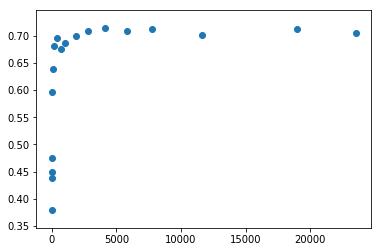

In [0]:
def LogisticRegression_model2(C=0.25, penalty = "l2", vocabulary = None):
  """ Function to fit Logistic Regression classifier"""
  
  train_data, dev_data, train_labels, dev_labels
  logreg_pipe=Pipeline([('vectors', CountVectorizer(vocabulary=vocabulary)), 
                        ('logistic_reg', 
                         LogisticRegression(C=C, penalty = penalty, 
                                            solver = 'liblinear', 
                                            multi_class = 'ovr', 
                                            max_iter = 1000, tol = 0.01))])
  logreg_pipe.fit(train_data,train_labels)
  
  return logreg_pipe

def zero_weight_percent(coefs):
  "Returns the percentage of coeffient weights in a matrix that are non-zero"
  return 100*(np.count_nonzero(coefs))/coefs.size

def P6():
  # Keep this random seed here to make comparison easier.
  np.random.seed(0)

  ### STUDENT START ###
  # Train logistic regression model with l2 penalty
  logreg_l2 = LogisticRegression_model2()
  coefs = logreg_l2.named_steps["logistic_reg"].coef_
  vocab_max = logreg_l2.named_steps["vectors"].get_feature_names()

  print('L2 penalty non-zero weight %: {:.3f}\n'.format(zero_weight_percent(coefs)))
  
  # Train logistic regression model with l1 penalty for various sizes of C
  
  #initialise empty lists
  reduced_vocab_len=[]
  f1_list =  []
  
  # Iterate through increasing regularisation strengths
  for C in [0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1.0, 2.5, 10, 25, 50, 100, 250, 500, 1000]: #np.logspace(-3,3,28):
    logreg_l1 = LogisticRegression_model2(C=C, penalty = "l1")
    coefs = logreg_l1.named_steps["logistic_reg"].coef_

    print('L1 penalty non-zero weight %: {:.3f} for C: {} \n'.format(zero_weight_percent(coefs), C))

    #get reduced vocab from the L1 model
    feature_indices = np.nonzero(coefs)[1]
    reduced_vocab = (set(np.take(vocab_max, feature_indices))) 
    
    #fit L2 model with the reduced vocab
    logreg_min_l2 = LogisticRegression_model2(vocabulary = reduced_vocab)
    dev_predict = logreg_min_l2.predict(dev_data)
    f1 = metrics.f1_score(dev_labels, dev_predict, average = "micro")

    #Create list of f1 and reduced vocab size for L2 models
    reduced_vocab_len.append(len(reduced_vocab))
    f1_list.append(f1)
    
  #plot f1 and vocabulary length for the L2 models
  plt.scatter(reduced_vocab_len, f1_list)
    ### STUDENT END ###
P6()

ANSWER: 
*The plot above shows that a vocabulary greater that ~1000 words does not add much additional accuracy to the model, and by ~4000 words there is no gain for additional words. Thus you can use a smaller vocabulary to decrease computation time for the L2 model without sacrificing accuracy.*

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

f1 Score: 0.763

R = 929.3571373334202, Correct = talk.religion.misc, Pred = comp.graphics

I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anything for their time in making copies, or in any way realize a profit
from the use 

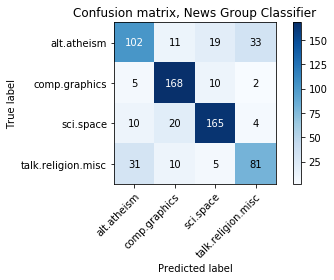

In [0]:
def P7(stop_words = None, C=100):
### STUDENT START ###
  """Fit a logistic regression model using the TfidfVectorizer. Report the worst three predictions from the development set"""

  tf_log_pipe = Pipeline([('vectors', TfidfVectorizer(sublinear_tf = False, 
                                                      stop_words = stop_words)),
                          ('logistic_reg', LogisticRegression(C=C,  
                                                              penalty = 'l2', 
                                                              solver = 'liblinear', 
                                                              multi_class = 'ovr'))])

  tf_log_pipe.fit(train_data, train_labels)
  dev_predict = tf_log_pipe.predict(dev_data)

  f1 = metrics.f1_score(dev_labels, dev_predict,  average = "micro")
  print("f1 Score: {0:.3f}\n".format(f1))
  
  # Extract probabilities.
  probabilities = tf_log_pipe.predict_proba(dev_data)

  # Generate a list of ratios from the propability vectors.
  r_list = np.asarray(list(map(ratio_r, enumerate(probabilities))))

  # Find the top 3.
  r_list_index = np.argsort(r_list)[:-4:-1]
  for  i in r_list_index:
    print("R = {}, Correct = {}, Pred = {}\n".format(r_list[i],
    newsgroups_train.target_names[dev_labels[i]],
    newsgroups_train.target_names[dev_predict[i]]))
    print(dev_data[i])
    print()
    
  # print the confusion matrix
  # Compute confusion matrix
  cm = confusion_matrix(dev_labels, dev_predict)
  print ("\nThe confusion matrix for the model using TfidfVectorizer")
  # Plot non-normalized confusion matrix
  plot_confusion_matrix(cm = cm, classes=  newsgroups_train.target_names,
                      title='Confusion matrix, News Group Classifier')
  
  return tf_log_pipe

def ratio_r(x):
  """Calculate the ratio of maximum predicted probability to predicted probability
  of the correct label in the dev set.
  """
  n = x[0]
  prob = x[1]
  20
  max_prob = np.max(prob)
  correct = prob[dev_labels[n]]
  return max_prob / correct

# Code for plot_confusion_matrix adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    """



    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## STUDENT END ###
P7()

ANSWER: *The CountVectorizer in its original form is an integer count of the number of time a word from the corpus occurs in the sample. The corpus is defined by each unique word in the training set. The TfidVectorizer is a mathematical attempt to filter out the impact of words that are common to a language and thus carry little meaning to the content of a documents (e.g.“the”, “a”, “is” in English). It allows the benefits of a 'stop word list' but without the pitfalls of choosing a custom list that is unsuitable for the dataset. TfidVectorizer does this by providing a floating number score for each word which increases proportionally to count, but is offset by the frequency of the word in the corpus. This is the IDF (inverse document frequency part).This means that the words appear more frequently score lower than using a simple CountVectorizer.*


*For this dataset, the TfidVectorizer preprocessor is more accurate than the CountVectorizer, giving an f1 score  of 0.763. Analysing top three mismatches by the TfidVectorizer:*


1.  This religion article has been incorrectly assigned the comp.graphics label instead of talk.religion.misc. Although this text is about the Book of Mormon, it refers to several common computer sciecne terms: postscript, ftp, ASCII and LaTex. These terms would be more common in texts about graphics, hence the missclassification.
2.   This example is a short text which refers to getting an online copy of the 'Book of Mormon'. It was assigned the comp.graphics label instead of talk.religion.misc. The misclassification is also likely due to the presence of common words related to the internet such as 'online' and 'ftp'.
3. The third text is an example of the most frequent error by the model, confusing talk.religion.misc and alt.athesim labels. This is evident in the confusion matrix above. In this case the text was mislabeled talk.religion.misc instead of athesim. This is likely due to the common overlap in the two subjects, in this case the shooting may have been refering to an act of religious extremism iif it was contained in a larger text experpt to give it religious context. However, in this case it refers to a shooting without referal to religion.  **This could be done by removing the vocabulary that has a relatively high weight for both labels from the model.**





(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

I decided to try and reduce the confusion between the talk.religion.misc and alt.athesim labels by removing the vocabulary that has a relatively high weight for both labels from the model. I compared the coef_ for the top 100 words in each catagory and added the word to a stop_words list if the weight of the opposite label was >-0.5. This was to remove words from the vocabulary set that were relatively common to both catagories. The expacted outcome was to reduce the number of confused labels between talk.religion.misc and alt.athesim.


As can be seen below,  this approach was successful in increasing the accuracy from 0.763 to 0.769,  a small increase in accuracy. This approach was sensitive to both the number of words chosen to compare (100 was most beneficial) and the cut-off for the lesser weight (-0.5 used).



In [55]:
def P8(C=100, number_words = 100):
### STUDENT START ###
  """Train a logistic regression model using the TfidfVectorizer preprocessor. Finds the top #number_words weighted words in both talk.religion.misc and alt.athesim labels. 
  Then extracts words which are have relatively high weights for the opposite catagory (greater than -0.5)
  and builds a custom combined_stop_word list that can be used in a custom TfidfVectorizer preprocessor"""

  tf_log_pipe = Pipeline([('vectors', TfidfVectorizer(sublinear_tf = False)),
                          ('logistic_reg', LogisticRegression(C=C,  
                                                              penalty = 'l2', 
                                                              solver = 'liblinear', 
                                                              multi_class = 'ovr'))])

  tf_log_pipe.fit(train_data, train_labels)
  dev_predict = tf_log_pipe.predict(dev_data)

  #Get top number of words (number_words) in both talk.religion.misc and alt.athesim labels
  indices = np.argpartition(tf_log_pipe.named_steps["logistic_reg"].coef_, -(number_words), axis=1)[:, -(number_words):]

  #alt.athesim labels corresponding to religion top 50 where coef>-1.5
  athesim_stop_words = [tf_log_pipe.named_steps["vectors"].get_feature_names()[indices[0][j]] for j in  range(50) if -0.5 <= tf_log_pipe.named_steps["logistic_reg"].coef_[0][indices[3][j]]]
  print('athesim_stop_words:', athesim_stop_words)
   #religion labels corresponding to atheism top 50 where coef>-1.5
  religion_stop_words = [tf_log_pipe.named_steps["vectors"].get_feature_names()[indices[3][j]] for j in  range(50) if -0.5 <=tf_log_pipe.named_steps["logistic_reg"].coef_[3][indices[0][j]] ]
  print('religion_stop_words:', religion_stop_words)
  #combine stop_word lists
  combined_stop_words = athesim_stop_words + religion_stop_words
  print('combined_stop_words:', combined_stop_words)
  
  coefs = tf_log_pipe.named_steps["logistic_reg"].coef_
  vocab_max = tf_log_pipe.named_steps["vectors"].get_feature_names()
  
  return combined_stop_words

## STUDENT END ###
# combined_stop_words = P8(number_words = 50)
combined_stop_words = P8(number_words = 100)
# combined_stop_words = P8(number_words = 75)



athesim_stop_words: ['arguments', 'amen', 'people', 'palestinians', 'worse', 'alternative']
religion_stop_words: ['taoism', 'story', 'fake', 'that', 'jose', 'josephus', 'truth', 'compuserve']
combined_stop_words: ['arguments', 'amen', 'people', 'palestinians', 'worse', 'alternative', 'taoism', 'story', 'fake', 'that', 'jose', 'josephus', 'truth', 'compuserve']


**Next step:** Remove the words from the vocabulary that have been identified as common confusion between religion and athesim and retrain the model from P7.

Words:
['arguments', 'amen', 'people', 'palestinians', 'worse', 'alternative', 'taoism', 'story', 'fake', 'that', 'jose', 'josephus', 'truth', 'compuserve']

*It is evident from the R scores that this increase confusion for the example 1 and 2, but it had a significant reduction on the 3rd example which was the error I was trying to address. The R score for that example dropped out of the top 3 (originally 287), and the next worse example (which was of a similar type) dropped  to 154.*

*The confusion matrix also saw a small improvement across all the categories.*

f1 Score: 0.769

R = 1196.1981526082907, Correct = talk.religion.misc, Pred = comp.graphics

I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anything for their time in making copies, or in any way realize a profit
from the use

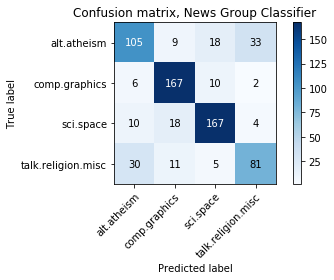

In [56]:
P7(stop_words =  combined_stop_words, C=100)